### 99. Recover Binary Search Tree

#### Content
<p>You are given the <code>root</code> of a binary search tree (BST), where the values of <strong>exactly</strong> two nodes of the tree were swapped by mistake. <em>Recover the tree without changing its structure</em>.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/10/28/recover1.jpg" style="width: 422px; height: 302px;" />
<pre>
<strong>Input:</strong> root = [1,3,null,null,2]
<strong>Output:</strong> [3,1,null,null,2]
<strong>Explanation:</strong> 3 cannot be a left child of 1 because 3 &gt; 1. Swapping 1 and 3 makes the BST valid.
</pre>

<p><strong>Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/10/28/recover2.jpg" style="width: 581px; height: 302px;" />
<pre>
<strong>Input:</strong> root = [3,1,4,null,null,2]
<strong>Output:</strong> [2,1,4,null,null,3]
<strong>Explanation:</strong> 2 cannot be in the right subtree of 3 because 2 &lt; 3. Swapping 2 and 3 makes the BST valid.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[2, 1000]</code>.</li>
	<li><code>-2<sup>31</sup> &lt;= Node.val &lt;= 2<sup>31</sup> - 1</code></li>
</ul>

<p>&nbsp;</p>
<strong>Follow up:</strong> A solution using <code>O(n)</code> space is pretty straight-forward. Could you devise a constant <code>O(1)</code> space solution?

#### Difficulty: Medium, AC rate: 45.8%

#### Question Tags:
- Tree
- Depth-First Search
- Binary Search Tree
- Binary Tree

#### Links:
 🎁 [Question Detail](https://leetcode.com/problems/recover-binary-search-tree/description/) | 🎉 [Question Solution](https://leetcode.com/problems/recover-binary-search-tree/solution/) | 💬 [Question Discussion](https://leetcode.com/problems/recover-binary-search-tree/discuss/?orderBy=most_votes)

#### Hints:


#### Sample Test Case
[1,3,null,null,2]

---
What's your idea?

根据 BST 的特点，分别从正向、逆向中序遍历扫一遍树，找出第一个不按顺序排的节点，交换两个节点的值

---

In [45]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def recoverTree(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        if root is None:
            return
        prev = [None]
        self.forward(root, prev)
        one_mistake = prev[0]
        prev = [None]
        self.backward(root, prev)
        another_mistake = prev[0]
        one_mistake.val, another_mistake.val = another_mistake.val, one_mistake.val
        
    def forward(self, node, prev):
        if node is None:
            return False
        left_found = self.forward(node.left, prev)
        if left_found:
            return True
        if prev[0] and node.val < prev[0].val:
            return True
        prev[0] = node
        right_found = self.forward(node.right, prev)
        if right_found:
            return True
        return False

    def backward(self, node, prev):
        if node is None:
            return False
        right_found = self.backward(node.right, prev)
        if right_found:
            return True
        if prev[0] and node.val > prev[0].val:
            return True
        prev[0] = node
        left_found = self.backward(node.left, prev)
        if left_found:
            return True
        return False

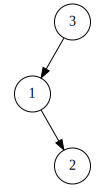

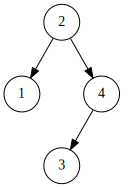

In [47]:
from helper import array_to_tree
from visualizer import visualize_binary_tree
s = Solution()

t = array_to_tree([1,3,None,None,2])
s.recoverTree(t)
visualize_binary_tree(t)

t = array_to_tree([3,1,4,None,None,2])
s.recoverTree(t)
visualize_binary_tree(t)

In [48]:
import sys, os; sys.path.append(os.path.abspath('..'))
from submitter import submit
submit(99)

😃 Result: Accepted

📥 Input: ``

📤 Output: ``

✅ Expected: ``

💯 Passed Test Case: 1919 / 1919

🚀 Runtime: 112 ms, Memory: 14.2 MB

🉑 Runtime Percentile: better than 37.05%, Memory Percentile: better than 88.99%

📆 Finished At: 2022-02-17